# CREDIT CARD FRAUD DETECTION

**Fraud can be detected based on the behaviour. If the behaviour is completely different from the other cases then it is said to be a fraud case, because in such cases the intruder will use uncommon methods to login. So in this task it becomes imprtant to detect the outliers in the dataset.**

**First of all we need to import all the important packages**

In [49]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**We will download the necessary dataset. In this task I downloded dataset from Kaggle**

In [50]:
data=pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**It is important to know about the dataset before we proceed forward. So we will get the details of the dataset before we proceed further**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Here we should know what are the classes in the transactions of the dataset and the way they are represented.**

In [52]:
data['Class'].unique()

array([0, 1])

**Now we will label the fraud transactions with 1 and the valid ones with 0. Also we will count the number of fraud cases and the valid cases.**

In [53]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlier=len(fraud)/float(len(valid))
outlier

0.0017304750013189597

In [54]:
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Cases: {}'.format(len(data[data['Class'] == 0])))

Fraud Cases: 492
Valid Cases: 284315


In [55]:
print('Details of Fraud transaction:')
fraud.Amount.describe()

Details of Fraud transaction:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**We will now get the correlation of values in the dataset.**

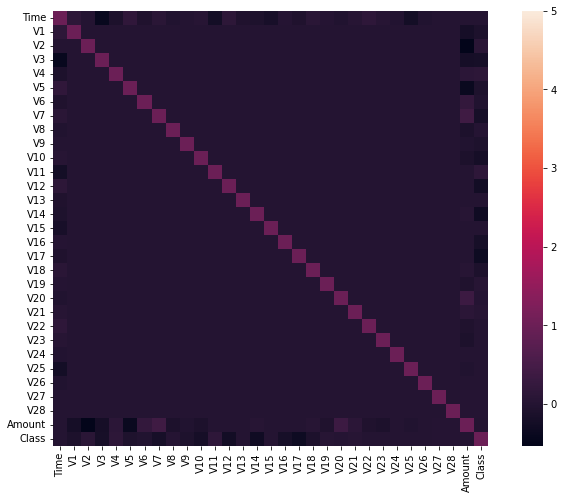

In [56]:
cor=data.corr()
fig=plt.figure(figsize=(12,8))
sns.heatmap(cor,vmax=5,square=True)
plt.show()

**After the analysis of the data it is important to get the datasets for the model trainig.**

In [57]:
x=data.drop(['Class'],axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [58]:
y=data['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=40, test_size=0.25)
xtrain

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
227638,145151.0,-0.328145,0.991143,-0.274629,-0.759903,0.314290,-0.569178,0.565008,0.412400,-0.393662,...,-0.111782,-0.193199,-0.586273,0.091434,-0.511435,-0.437155,0.153475,0.110250,0.019783,17.99
211016,138221.0,2.129270,0.016591,-1.475568,0.148624,0.524789,-0.495706,0.242627,-0.321899,0.398615,...,-0.107482,-0.336423,-0.752897,0.200881,-1.024659,-0.125687,0.261407,-0.059629,-0.068191,1.29
8421,11287.0,-1.214225,1.054354,3.187293,3.222221,-0.110883,0.980664,-0.415994,-0.801693,0.598138,...,-0.095643,0.490286,-0.391871,-0.175161,0.497347,-0.077802,0.078434,-0.260956,-0.075795,18.96
68511,53027.0,-1.182320,1.672887,0.331054,0.665913,-0.105925,0.116463,-0.037906,0.961579,-1.140137,...,-0.075583,0.273699,0.679682,-0.091637,-0.278038,-0.200086,-0.295150,0.054926,0.073373,14.70
81876,59139.0,-0.906358,1.040641,0.876514,1.057104,-0.564895,-0.975746,0.646942,0.294364,-0.676641,...,0.204805,0.228459,0.477251,0.136060,0.701922,-0.198740,-0.337570,0.262534,0.149400,91.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138911,82912.0,-0.746363,1.427544,1.196475,1.213289,-0.187187,-0.431339,0.254315,0.428527,-0.883664,...,0.072226,0.241926,0.811914,-0.096571,0.427751,-0.203469,-0.191222,0.314414,0.146678,1.00
200211,133338.0,-0.836827,0.197551,1.425084,-0.814607,0.781293,1.564700,-0.067812,0.709666,0.456200,...,-0.035740,0.340147,1.293175,-0.119527,-1.408162,-0.373323,0.768922,0.398510,0.183082,22.29
137031,81988.0,0.942883,0.353067,0.671608,2.147001,0.668415,1.837514,-0.290516,0.632040,-1.050095,...,-0.248841,-0.071237,-0.173220,0.251591,-1.058023,-0.090554,-0.156453,0.061092,0.005493,9.91
142604,84819.0,-0.531536,0.854556,1.595593,0.477754,0.114464,-0.287914,1.748649,-0.644067,-0.317733,...,-0.111065,-0.467143,-0.978935,0.203441,0.333213,-0.328248,-0.956925,-0.443684,-0.466231,114.00


In [60]:
xtest

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
65918,51803.0,1.133835,-0.667209,0.258635,0.470179,-0.935900,-0.302215,-0.454738,0.065285,-0.967113,...,-0.462132,-0.263662,-0.599348,-0.104886,-0.096113,0.408226,-0.327570,0.012450,0.027796,100.00
114415,73472.0,-1.130695,0.812982,0.892485,-0.552766,1.834398,4.246646,-0.567269,1.318548,0.117874,...,0.003925,-0.042054,-0.176423,-0.334663,0.998892,0.452230,-0.412572,-0.437357,-0.220802,9.99
251942,155577.0,2.045388,0.003926,-1.198560,1.596251,0.500370,0.213221,-0.096227,-0.075300,-0.828483,...,-0.074262,0.195569,0.649778,-0.055347,-0.876479,-0.139110,2.526769,-0.205892,-0.104809,12.74
249882,154621.0,-0.689977,0.906410,-1.304054,-2.154322,4.003081,2.890035,1.535151,0.439834,-1.131134,...,0.121729,-0.018225,-0.129991,-0.550813,0.651976,1.130701,0.645979,-0.251915,-0.184929,39.80
203702,134928.0,0.873930,-2.379076,-1.465831,0.527825,-0.778962,0.288092,0.189899,-0.143854,0.998534,...,1.153795,0.502168,0.157962,-0.415068,0.123369,-0.451026,0.594766,-0.157082,0.059854,628.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236701,148918.0,-1.436908,-0.879588,2.115640,-0.327025,-0.783329,0.765794,0.485824,-0.017635,-0.517843,...,-0.542246,-0.402477,-0.576128,-0.114844,0.560623,0.293441,-0.672808,-0.013334,-0.190700,275.00
281819,170437.0,-7.396395,6.013943,-4.980503,-0.862243,-4.374764,-1.191014,-4.693047,5.985338,-0.218687,...,-0.784140,0.276139,-0.977518,0.786447,0.467090,0.301403,-0.317265,-1.730339,-0.296545,1.00
201398,133870.0,1.971769,-0.317865,-2.399979,0.348845,2.445157,3.766269,-0.548896,0.881853,0.589323,...,-0.205347,0.104464,0.482539,0.049318,0.715655,0.360599,-0.441064,0.040536,-0.056178,9.99
278182,168082.0,-5.152005,-4.051905,-0.988406,0.850273,-1.077039,-0.069807,0.612624,0.907422,0.148405,...,1.055406,0.545223,0.338133,-0.441762,0.849197,-0.023103,-0.242945,0.532828,-0.612704,594.37


In [61]:
ytrain

227638    0
211016    0
8421      0
68511     0
81876     0
         ..
138911    0
200211    0
137031    0
142604    0
114369    0
Name: Class, Length: 213605, dtype: int64

In [62]:
ytest

65918     0
114415    0
251942    0
249882    0
203702    0
         ..
236701    0
281819    0
201398    0
278182    0
94713     0
Name: Class, Length: 71202, dtype: int64

**Now we need get the use the Random Forest Classifier and develop the model.**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf

RandomForestClassifier()

**After developing a model we will now find its accuracy,precision score, recall score and F1 score**

In [64]:
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)

In [65]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,pred)
print('The accuracy of the model: ',acc*100)

The accuracy of the model:  99.96769753658606


In [66]:
from sklearn.metrics import precision_score,recall_score, f1_score
prec=precision_score(ytest,pred)
print('The precision score of the model is: ',prec*100)

The precision score of the model is:  95.37037037037037


In [67]:
recall=recall_score(ytest,pred)
print('The recall score of the model is: ',recall*100)

The recall score of the model is:  85.12396694214877


In [68]:
f1=f1_score(ytest,pred)
print('The F1 score of the model is: ',f1*100)

The F1 score of the model is:  89.95633187772927


**We will now get a confusion matrix to know how the model is developed.**

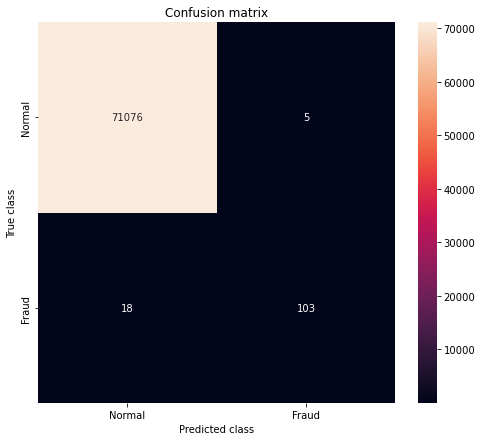

In [69]:
from sklearn.metrics import confusion_matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(ytest, pred)
plt.figure(figsize =(8,7))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# SUMMARY
**Finally we developed a model that can predict the fraud in the credit card transactions.**